<span style="font-family: Arial; font-weight:bold;font-size:3em;color:#0e92ea;">  Project - Ensemble Techniques

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;"> Name: Panagam Mohitha

**Domain:** Mobile Apps

**Context:** The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable. It is important for developers to be able to predict the success of their app and incorporate features that make an app successful. We can collect app data and user ratings from the app stores and use it to extract insightful information. 
A machine learning model can be used to predict a rating for a given app, which can be used to estimate success and scope of improvement. Actionable insights learned through such analysis can be used by developers to make a successful app and capture the Android market. 

**Data Description:** Shape - 10841 records and 13 columns

**Attribute Information:** 
* **App**: Application name
* **Category**: Category the app belongs to
* **Rating**: Overall user rating of the app 
* **Reviews**: Number of user reviews for the app
* **Size**: Size of the app 
* **Installs**: Number of user downloads/installs for the app 
* **Type**: Paid or Free
* **Price**: Price of the app
* **Content Rating**: Age group the app is targeted at - Children / Mature 21+ / Adult
* **Genres**: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
* **Last Updated**: Date when the app was last updated on Play Store 
* **Current Ver**: Current version of the app available on Play Store 
* **Android Ver**: Min required Android version 


**Objective:** To predict the rating for a mobile app given features like size, number of downloads, etc.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  1. Install the necessary libraries and read the provided dataset. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> Importing the library:

In [717]:
import warnings
import os
import numpy as np
import re
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial as f
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib.font_manager import FontProperties
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
import math as m
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [718]:
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.7f}'.format
pd.options.display.max_rows = None

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> Read data as Data frame:

In [719]:
app_data = pd.read_csv('C:\\Users\\Mohitha Panagam\\Downloads\\PROJECT\\Apps_data.csv')

In [720]:
app_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1000000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9000000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7000000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5000000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3000000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4000000,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8000000,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1000000,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4000000,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7000000,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  2. EDA and Preprocessing

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> a. Check the info and summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [721]:
app_data.shape

(10841, 13)

**Inference:**
* There are 10841 Observations / Rows and 13 Attributes / Columns.

In [722]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Inference:**
* Except Rating column every other columns are object data type

In [723]:
app_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10841.0000000,3.6218983,1.5145512,0.0000000,3.7000000,4.2000000,4.5000000,5.0000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> b. Check if there are any duplicate entries for the apps

In [724]:
def check_duplicate(app_data):
    duplicate=app_data[app_data.duplicated()]
    return duplicate.shape

duplicate=check_duplicate(app_data)
duplicate

(483, 13)

In [725]:
app_data = app_data.drop_duplicates()
app_data.shape

(10358, 13)

In [726]:
def check_duplicate(app_data):
    duplicate=app_data[app_data.duplicated()]
    return duplicate.shape

duplicate=check_duplicate(app_data)
duplicate

(0, 13)

**Inference:**
* There are 483 duplicate entries in the given data and those records are deleted.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> c. Check if there are any wrong values in the ‘Category’ column and impute 
them with relevant values.

In [727]:
app_data.Category.value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [728]:
app_data['Category'] = app_data['Category'].replace(['1.9'],'None')

**Inference:**
* There is 1.9 value as category and it is replaced by None as it is irrelevant to the column

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> d. Which category has the highest number of apps? 

In [729]:
app_data.Category.value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
None                      1
Name: Category, dtype: int64

**Inference:**
* Family Category has higher number of apps i.e.,1943

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> e. Check the distribution of rating column and convert ratings into two categories and save it in the data frame as ‘Rating_cat’ ( high = +>3.5 and remaining as low).

In [730]:
conditions = [
    (app_data['Rating'] >= 3.5),
    (app_data['Rating'] < 3.5)
    ]
values = ['High', 'Low']

app_data['Rating_cat'] = np.select(conditions, values)

app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1000000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9000000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7000000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5000000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3000000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [731]:
app_data.Rating_cat.value_counts()

High    8170
Low     2188
Name: Rating_cat, dtype: int64

**Inference:**
* Rating_cat given high if the rating is greater than 3.5 and given low if it is less than 3.5
* Therefore, There are High ratings for 8170 apps and 2188 low rated apps

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> f. Convert the ‘Review’ column to a numerical column and impute invalid values if there are any.

In [732]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
 13  Rating_cat      10358 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.2+ MB


In [733]:
app_data.drop([10472],axis=0,inplace=True)

In [734]:
app_data["Reviews"] = app_data["Reviews"].astype(int)

In [735]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int32  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
 13  Rating_cat      10357 non-null  object 
dtypes: float64(1), int32(1), object(12)
memory usage: 1.1+ MB


**Inference:**
* There is a observation in Reviews column i.e., 3.0M which restricts from the reviews column to be Interger.
* Therefore, 3.0M observation is removed from the column so that the reviews column can be converted to numerical column.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> g. Name the top 5 apps which have the highest number of reviews and their genre?

In [736]:
app_review_sort = app_data[['App','Reviews','Genres']].copy()

app_review_sort.sort_values(by='Reviews', ascending=False, inplace=True)

app_review_sort.head(5)

,App,Reviews,Genres
2544,Facebook,78158306,Social
3943,Facebook,78128208,Social
336,WhatsApp Messenger,69119316,Communication
3904,WhatsApp Messenger,69109672,Communication
2604,Instagram,66577446,Social


**Inference:**
* Facebook has highest reviews with 78158306 reviews.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> h. Make the values of ‘Size’ as integers by replacing M and K with correct values. Convert all the values to numeric and make invalid values to NaN.

In [737]:
app_data["Size"] = [ float(i.split('M')[0]) if 'M' in i else float(0) for i in app_data["Size"] ]

In [738]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1000000,159,19.0000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9000000,967,14.0000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7000000,87510,8.7000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5000000,215644,25.0000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3000000,967,2.8000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [739]:
app_data["Size"] = 1000 * app_data["Size"]

In [740]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1000000,159,19000.0000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9000000,967,14000.0000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7000000,87510,8700.0000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5000000,215644,25000.0000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3000000,967,2800.0000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


**Inference:**
* In size column the observations are in k and M size 
* Therefore, we have converted the size column in kb where 1Mb=1000kb 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> i. Remove “,” and “+” from the values of the “Installs” column and change the datatype.

In [741]:
app_data["Installs"] = [ float(i.replace('+','').replace(',', '')) if '+' in i or ',' in i else float(0) for i in app_data["Installs"] ]

In [742]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1000000,159,19000.0000000,10000.0000000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9000000,967,14000.0000000,500000.0000000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7000000,87510,8700.0000000,5000000.0000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5000000,215644,25000.0000000,50000000.0000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3000000,967,2800.0000000,100000.0000000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [743]:
app_data["Installs"] = app_data["Installs"].astype(int)

In [744]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int32  
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  int32  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
 13  Rating_cat      10357 non-null  object 
dtypes: float64(2), int32(2), object(10)
memory usage: 1.1+ MB


**Inference:**
* Replaced + , using replace function and converted Installs into numerical column

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> j. What is the percentage of paid apps in the data?

In [745]:
app_data.Type.value_counts('Paid')*100

Free   92.6129780
Paid    7.3870220
Name: Type, dtype: float64

**Inference:**
* Assuming 0 as free the share of paid apps in the data is 7.38%


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> k. Remove the “$” sign the “Price” column values and make it a numerical column.

In [746]:
app_data['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in app_data['Price'] ]

In [747]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1000000,159,19000.0000000,10000,Free,0.0000000,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9000000,967,14000.0000000,500000,Free,0.0000000,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7000000,87510,8700.0000000,5000000,Free,0.0000000,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5000000,215644,25000.0000000,50000000,Free,0.0000000,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3000000,967,2800.0000000,100000,Free,0.0000000,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [748]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int32  
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  int32  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
 13  Rating_cat      10357 non-null  object 
dtypes: float64(3), int32(2), object(9)
memory usage: 1.1+ MB


In [749]:
app_data["Price"] = app_data["Price"].astype(int)

In [750]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int32  
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  int32  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  int32  
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
 13  Rating_cat      10357 non-null  object 
dtypes: float64(2), int32(3), object(9)
memory usage: 1.1+ MB


**Inference:**
* Removed $ character from the price column and converted it into a numerical column.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> l. Which is the most expensive app and how much does it cost?

In [751]:
app_cost_sort = app_data[['App','Price']].copy()

app_cost_sort.sort_values(by='Price', ascending=False, inplace=True)

app_cost_sort.head(1)

,App,Price
4367,I'm Rich - Trump Edition,400


**Inference:**
* Sorted the price of the apps and I'm Rich - Trump Edition is the expensive app costs 400 dollars. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> m. Drop columns that you feel can not be used for model building. Example- App, Content Rating, Genre, Last updated, Current Ver, and Android Ver columns from the final data frame. 

In [752]:
app_data.drop(['App','Content Rating','Genres','Last Updated','Current Ver','Android Ver'], axis=1,inplace=True)
  
app_data.head()


,Category,Rating,Reviews,Size,Installs,Type,Price,Rating_cat
0,ART_AND_DESIGN,4.1000000,159,19000.0000000,10000,Free,0,High
1,ART_AND_DESIGN,3.9000000,967,14000.0000000,500000,Free,0,High
2,ART_AND_DESIGN,4.7000000,87510,8700.0000000,5000000,Free,0,High
3,ART_AND_DESIGN,4.5000000,215644,25000.0000000,50000000,Free,0,High
4,ART_AND_DESIGN,4.3000000,967,2800.0000000,100000,Free,0,High


**Inference:**
* Dropped the columns using drop function.

In [753]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    10357 non-null  object 
 1   Rating      10357 non-null  float64
 2   Reviews     10357 non-null  int32  
 3   Size        10357 non-null  float64
 4   Installs    10357 non-null  int32  
 5   Type        10356 non-null  object 
 6   Price       10357 non-null  int32  
 7   Rating_cat  10357 non-null  object 
dtypes: float64(2), int32(3), object(3)
memory usage: 606.9+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> n. Encode categorical column (Type, Rating_categories, Category) [ Hint -use get_dummies]

In [754]:
# Filter the numerical features in the dataset
df_numeric_features = app_data.select_dtypes(include=[np.number])

# display the numeric features
df_numeric_features.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price'], dtype='object')

In [755]:
# Filter the categorical features in the dataset.
df_categorical_features = app_data.select_dtypes(include=[np.object])

# display categorical features
df_categorical_features.columns

Index(['Category', 'Type', 'Rating_cat'], dtype='object')

In [756]:
# create data frame with only categorical variables that have been encoded
for col in df_categorical_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_categorical_features[col], prefix=col, drop_first=True)
    df_categorical_features = pd.concat([df_categorical_features, dummy_encoded_variables],axis=1)
    df_categorical_features.drop([col], axis=1, inplace=True)

In [757]:
# concatenate the numerical and dummy encoded categorical variables
df_dummy = pd.concat([df_numeric_features, df_categorical_features], axis=1)

In [758]:
# display data with dummy variables
df_dummy.head() 

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Rating_cat_Low
0,4.1000000,159,19000.0000000,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9000000,967,14000.0000000,500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7000000,87510,8700.0000000,5000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5000000,215644,25000.0000000,50000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3000000,967,2800.0000000,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  3. Prepare data for modeling

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> a. Segregate dependent variable and independent features into two separate variables and split the data into train and test set

In [759]:
cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price'] # one or more

Q1 = app_data[cols].quantile(0.25)
Q3 = app_data[cols].quantile(0.75)
IQR = Q3 - Q1

app_data = app_data[~((app_data[cols] < (Q1 - 1.5 * IQR)) |(app_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [760]:
app_data.shape

(5328, 8)

In [761]:
app_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Rating_cat
0,ART_AND_DESIGN,4.1000000,159,19000.0000000,10000,Free,0,High
1,ART_AND_DESIGN,3.9000000,967,14000.0000000,500000,Free,0,High
4,ART_AND_DESIGN,4.3000000,967,2800.0000000,100000,Free,0,High
5,ART_AND_DESIGN,4.4000000,167,5600.0000000,50000,Free,0,High
6,ART_AND_DESIGN,3.8000000,178,19000.0000000,50000,Free,0,High


In [762]:
app_data.describe()

,Rating,Reviews,Size,Installs,Price
count,5328.0000000,5328.0000000,5328.0000000,5328.0000000,5328.0000000
mean,4.1742868,8082.8393393,13963.7950450,312375.3607357,0.0000000
std,0.4904259,16514.6826022,14410.3617455,413720.5537387,0.0000000
min,2.6000000,1.0000000,0.0000000,1.0000000,0.0000000
25%,3.9000000,61.7500000,3200.0000000,5000.0000000,0.0000000
50%,4.2000000,728.5000000,8300.0000000,100000.0000000,0.0000000
75%,4.5000000,7328.2500000,21000.0000000,500000.0000000,0.0000000
max,5.0000000,112565.0000000,60000.0000000,1000000.0000000,0.0000000


**Inference:**
* The numerical columns are cleaned accordingly due to presence of outliers.

In [763]:
y = app_data['Rating_cat']
X = app_data[['Rating','Reviews','Size','Installs','Price']]

In [764]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=100)

In [765]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)


y_train.replace({ 'Low':0, 'High':1}, inplace=True)
y_test.replace({'Low':0, 'High':1}, inplace = True)

In [766]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    model.fit(X_train, y_train)
    
    test_accuracy = model.score(X_test, y_test)
    train_accuracy = model.score(X_train, y_train)
    
    pred = model.predict(X_test)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    specificity = recall_score(y_test, pred, pos_label=0)
    f1_score = f1_score(y_test, pred)
    
    return test_accuracy, train_accuracy, precision, recall, specificity, f1_score

In [767]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  4. Build a classifier model to predict the rating category (Rating_cat - high or low) using the following algorithm and make predictions on the test data. Evaluate the 
model and report your results.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> 
a. Decision Tree Classifier 


In [768]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=100)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [769]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
1.0


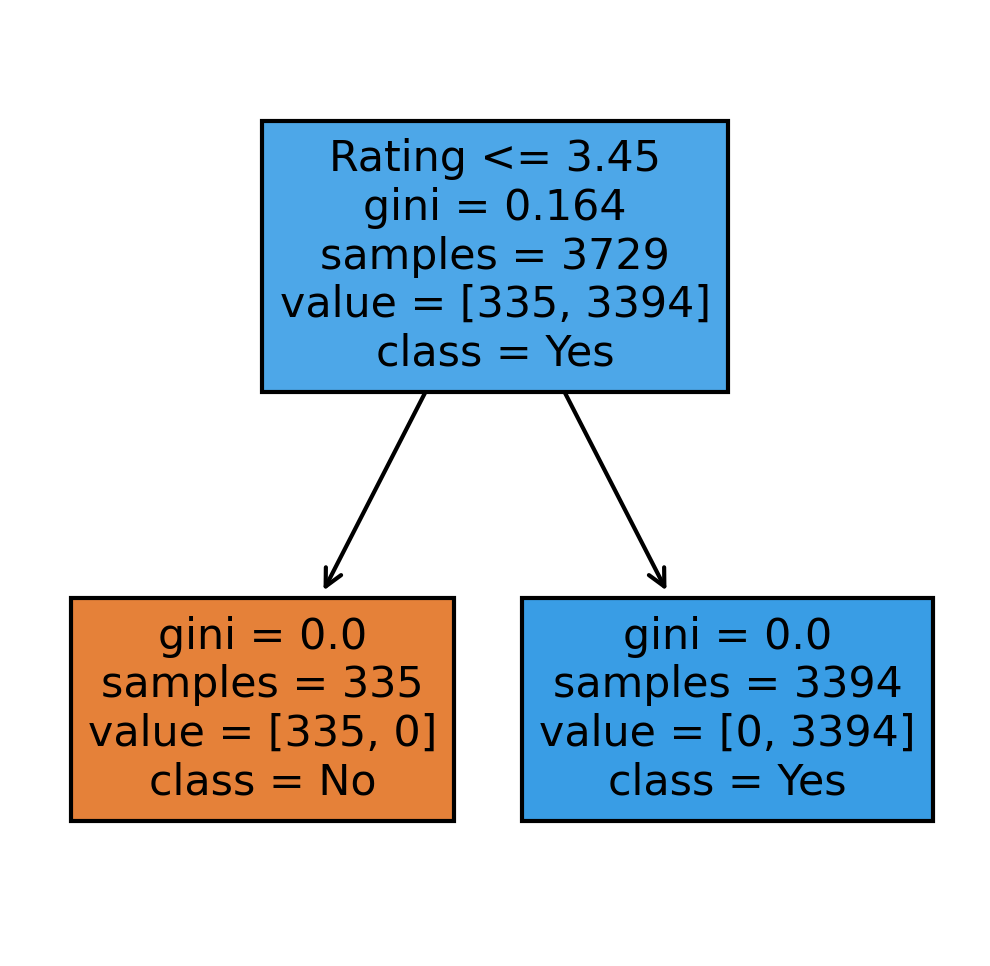

In [770]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [771]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

In [772]:
print("Train R2_score",r2_score(y_train,y_train_pred))
print("Test R2_score",r2_score(y_test,y_test_pred))

Train R2_score 1.0
Test R2_score 1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> b. Random Forest model 


In [773]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500, random_state=100,max_features=5)
rfcl = rfcl.fit(X_train, y_train)

1.0


<AxesSubplot:>

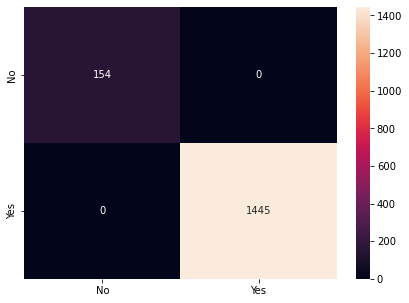

In [774]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [775]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

In [776]:
print("Train R2_score",r2_score(y_train,y_train_pred))
print("Test R2_score",r2_score(y_test,y_test_pred))

Train R2_score 1.0
Test R2_score 1.0


In [777]:
print(rf)

RandomForestRegressor()


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> c. Gradient Boosting model 


In [778]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 500,random_state=100)
gbcl = gbcl.fit(X_train, y_train)

1.0


<AxesSubplot:>

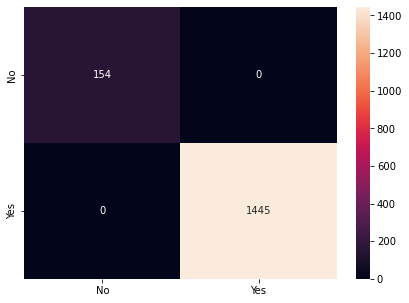

In [779]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> d. Stacking model 

In [780]:
ada = AdaBoostRegressor(base_estimator=dt, random_state=5, learning_rate=0.1)
ada.fit(X_train,y_train)
y_test_pred = ada.predict(X_test)
y_train_pred = ada.predict(X_train)

In [781]:
print(ada)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  random_state=5)


In [782]:
print("Train R2_score",r2_score(y_train,y_train_pred))
print("Test R2_score",r2_score(y_test,y_test_pred))

Train R2_score 1.0
Test R2_score 1.0


In [ ]:
stack = StackingRegressor((lnr, dt, rf, ada),
                            rf, cv=12)

stack.fit(X_train, y_train)
y_test_pred = stack.predict(X_test)
y_train_pred = stack.predict(X_train)

In [784]:
print("Train R2_score",r2_score(y_train,y_train_pred))
print("Test R2_score",r2_score(y_test,y_test_pred))

Train R2_score 1.0
Test R2_score 1.0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  5. Check the importance of different features by using model.feature_importances_ 
function in Python

In [785]:
max_depth = [3,5]
max_features = [3,5]
for i in max_depth:
  for j in max_features:
    dt = DecisionTreeRegressor(max_depth = i, max_features=j)
    dt.fit(X_train,y_train)
    y_test_pred = dt.predict(X_test)
    y_train_pred = dt.predict(X_train)
    print(f"Train R2_score with max_depth = {i}, max_feature = {j}",r2_score(y_train,y_train_pred))
    print(f"Test R2_score with max_depth = {i}, max_feature = {j}",r2_score(y_test,y_test_pred))
    print("-"*20)

Train R2_score with max_depth = 3, max_feature = 3 1.0
Test R2_score with max_depth = 3, max_feature = 3 1.0
--------------------
Train R2_score with max_depth = 3, max_feature = 5 1.0
Test R2_score with max_depth = 3, max_feature = 5 1.0
--------------------
Train R2_score with max_depth = 5, max_feature = 3 1.0
Test R2_score with max_depth = 5, max_feature = 3 1.0
--------------------
Train R2_score with max_depth = 5, max_feature = 5 1.0
Test R2_score with max_depth = 5, max_feature = 5 1.0
--------------------


In [786]:
pd.Series(dt.feature_importances_, index = X_train.columns)

Rating     1.0000000
Reviews    0.0000000
Size       0.0000000
Installs   0.0000000
Price      0.0000000
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  6. Comment on your results and findings from the above analysis. What can you 
infer about how to make a highly rated mobile App from this project?

In [787]:
result = pd.DataFrame(columns=['test_accuracy', 'train_accuracy', 'precision', 'recall', 'specificity','f1_score'])

for name, model in zip(['Logistic Regression', 'Decisiontreeclassifier','DecisionTreeRegressor','RandomForestRegressor',
                        'RandomForestClassifier','GradientBoostingClassifier','AdaBoostRegressor' ], 
                       [lr, dTree, dt, rf, rfcl, gbcl, ada]):
                       
    result.loc[name,:] = fit_n_print(model, X_train_sd, X_test_sd, y_train, y_test)

In [788]:
result

,test_accuracy,train_accuracy,precision,recall,specificity,f1_score
Logistic Regression,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
Decisiontreeclassifier,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
DecisionTreeRegressor,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
RandomForestRegressor,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
RandomForestClassifier,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
GradientBoostingClassifier,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
AdaBoostRegressor,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000


This dataset seems to be prone to overfit. And thus performed well on simpler models. All models are perfect as per the prediction of the analysis.